<a href="https://colab.research.google.com/github/localhersheys/k-means-clustering-from-scratch/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d uciml/iris

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 2.26MB/s]


In [2]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# fetch dataset
iris = pd.read_csv('/content/Iris.csv')

In [4]:
X_data = np.array(iris)
X_data = X_data.T
Y_data = X_data[5]
X_data = X_data[0:5]
X_data.shape

(5, 150)

In [11]:
Y_data[Y_data == 'Iris-setosa'] = 0
Y_data[Y_data == 'Iris-versicolor'] = 1
Y_data[Y_data == 'Iris-virginica'] = 2
Y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

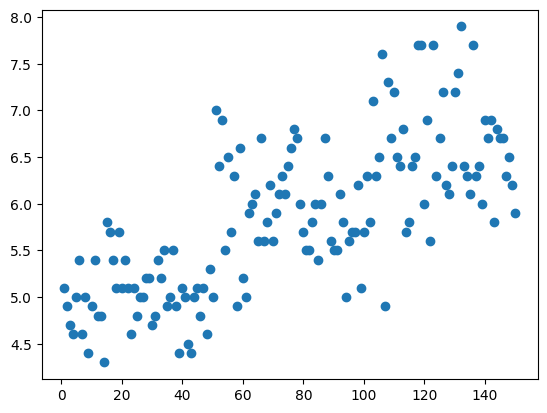

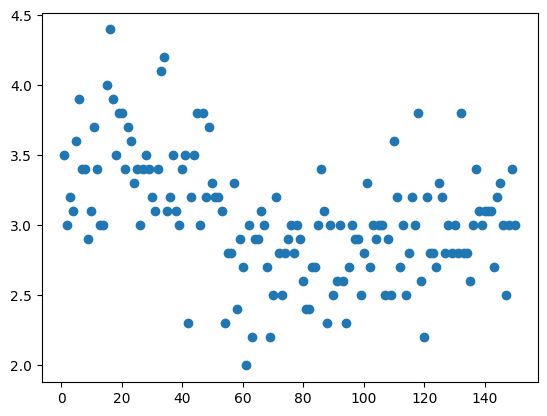

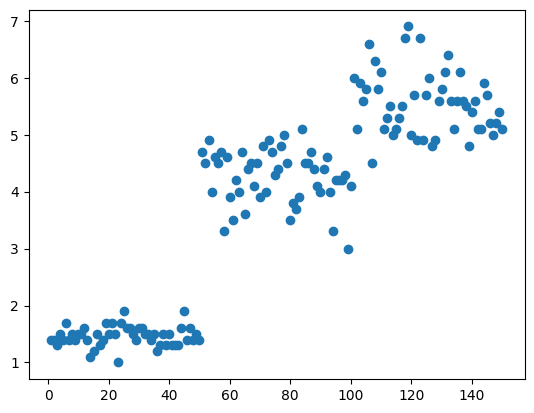

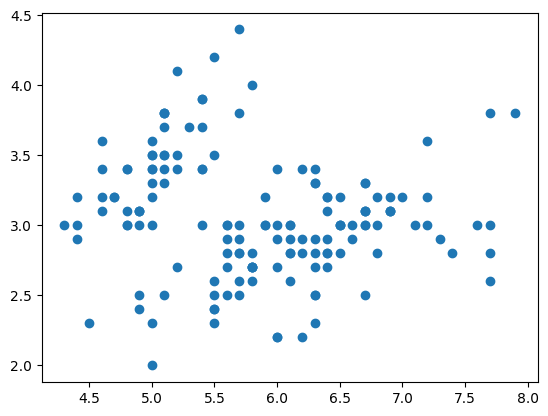

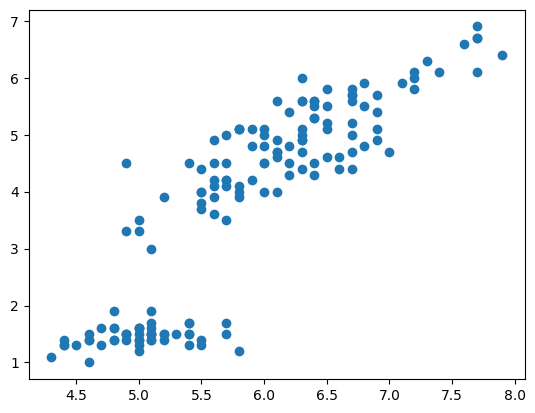

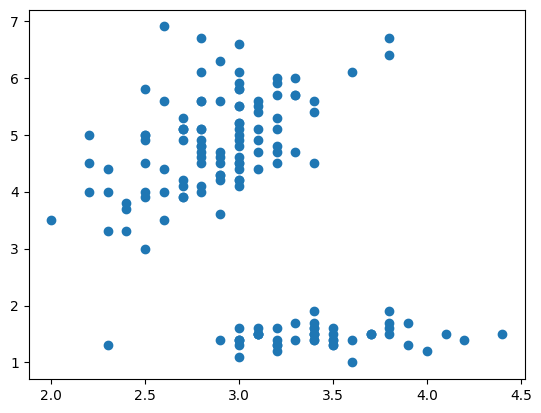

In [12]:
plt.scatter(X_data[0],X_data[1])
plt.show()
plt.scatter(X_data[0],X_data[2])
plt.show()
plt.scatter(X_data[0],X_data[3])
plt.show()
plt.scatter(X_data[1],X_data[2])
plt.show()
plt.scatter(X_data[1],X_data[3])
plt.show()
plt.scatter(X_data[2],X_data[3])
plt.show()

#Method 1: choosing random elements as centroids from the dataset itself

In [13]:
#finding euclidean distance
def find_dist_1(x, y, m):
    return np.sqrt(np.square(x - x[m]) + np.square(y - y[m]))

def find_mean_1(x):
    if x.size!=0:
        return sum(x)/x.size
    else:
        return 0

def calc_dist_1(x,y,mean):
    return np.sqrt(np.square(x-mean[0]) + np.square(y-mean[1]))

In [22]:
#forms k clusters
def form_cluster_1(k, x, y):
    #get k random indexes for the k clusters and store in indexes
    indexes = np.random.choice(x.size,k, replace = False)
    #calculate the distance of all the points from these three points
    dist = np.random.choice(5,(k,x.size))
    for i in range(k):
        dist[i] = find_dist_1(x.astype(float), y.astype(float), indexes[i])
    #form the classes on the basis of distance from each cluster head
    classified = np.argmin(dist, axis=0)
    #find mean of each class
    mean = np.random.choice(1,(i+1,2))
    for i in range(k):
        mean[i][0] = find_mean_1(x[classified==i].astype(float))
        mean[i][1] = find_mean_1(y[classified==i].astype(float))
    #calculate distance from mean
    for i in range(k):
        dist[i] = calc_dist_1(x.astype(float),y.astype(float),mean[i])
    #classify according to the distance from means
    classified = np.argmin(dist, axis=0)
    #calculate variance
    var = 0
    for i in range(k):
        if (sum(classified == i)>0): var+= sum(np.square(dist[i][classified==i].astype(float)))/sum(classified==i)
    return classified, var, indexes

#defining a function for classifier
def classifier_1(k, x, y, iterations, Y):
    #setting up dummy variables for storing the final answer
    final_classification = np.random.choice(1,x.size)
    final_var = math.inf
    #for 'iteration' no. of possibilities of cluster divisions
    for i in range(iterations+1):
        classified, var, indexes = form_cluster_1(k, x, y)
        #changing the final answer if we get lesser variation
        if var < final_var :
            final_var = var
            final_classification = classified
        if i%10==0:
            print('iteration number : ', i)
            print('variance : ',final_var)
            for j in range(k):
                plt.scatter(x[final_classification==j],y[final_classification==j])
                plt.scatter(x[indexes], y[indexes], marker='x', color="black")
            plt.show()
    return final_classification, final_var

iteration number :  0
variance :  687.1855345911949


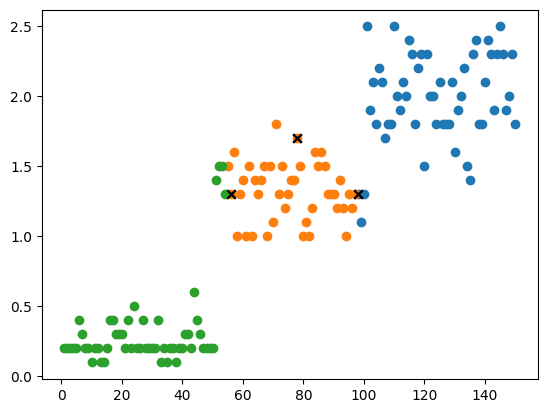

iteration number :  10
variance :  628.1666666666666


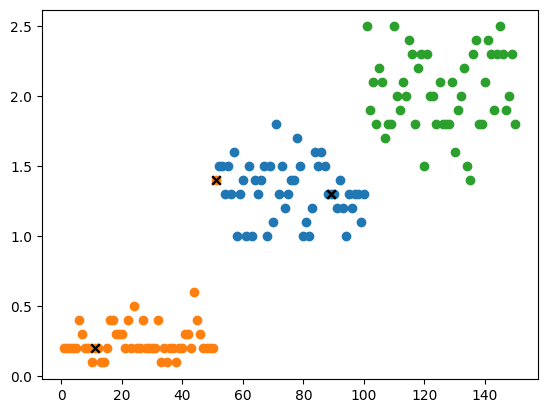

iteration number :  20
variance :  626.1666666666666


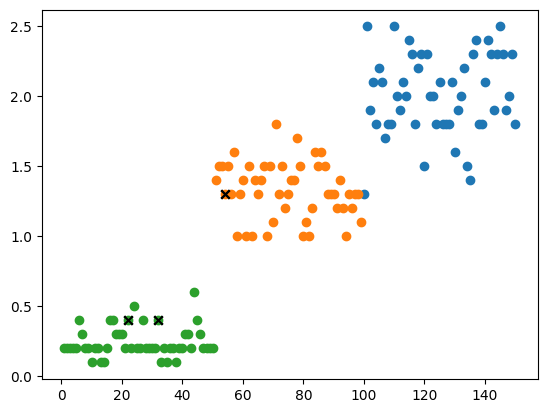

iteration number :  30
variance :  626.1666666666666


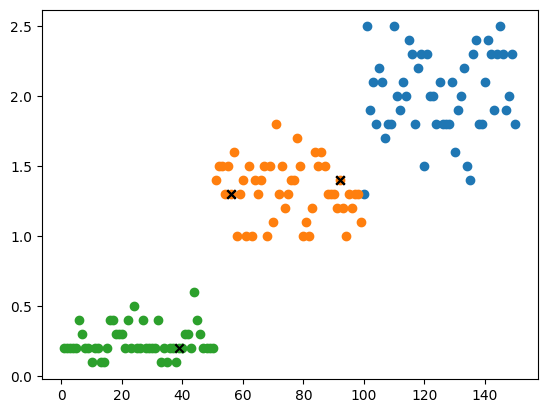

iteration number :  40
variance :  626.1666666666666


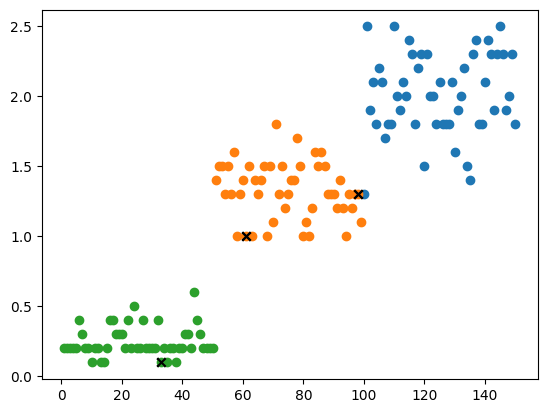

iteration number :  50
variance :  626.1666666666666


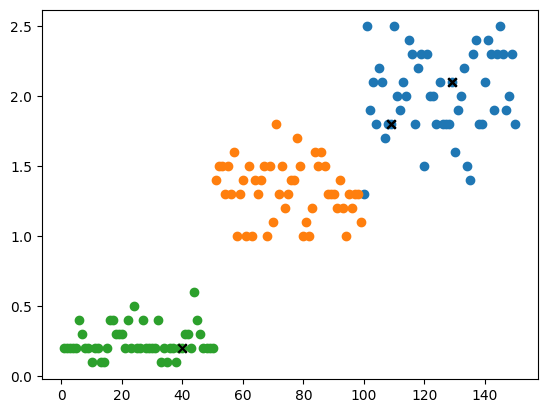

iteration number :  60
variance :  626.1666666666666


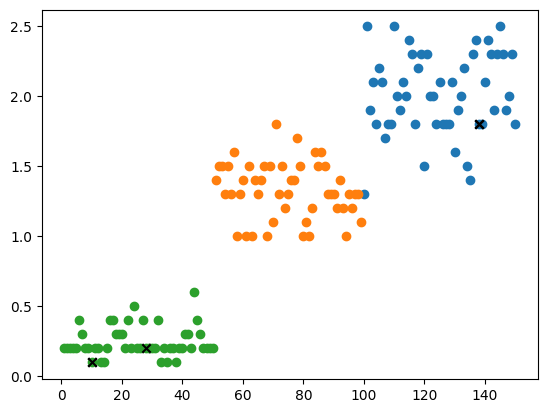

iteration number :  70
variance :  626.1666666666666


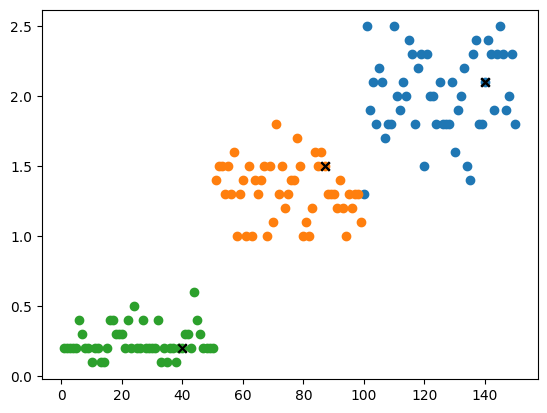

iteration number :  80
variance :  626.1666666666666


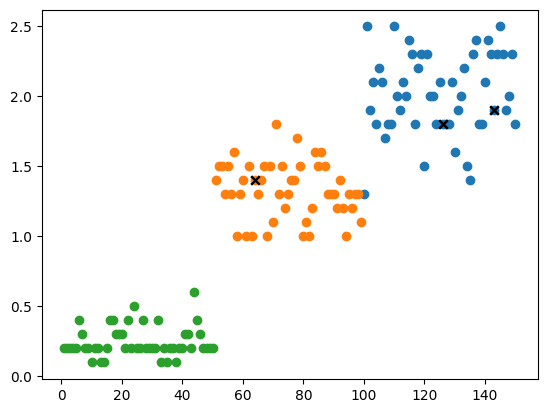

iteration number :  90
variance :  626.1666666666666


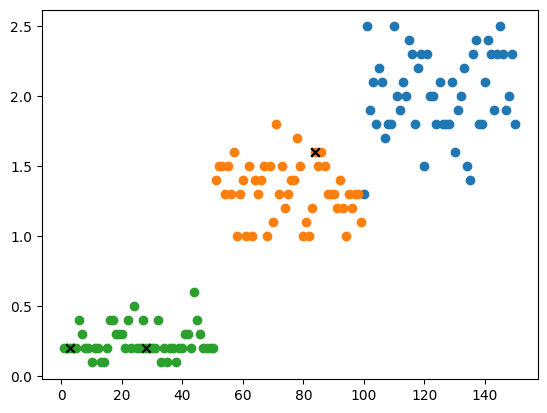

iteration number :  100
variance :  626.1666666666666


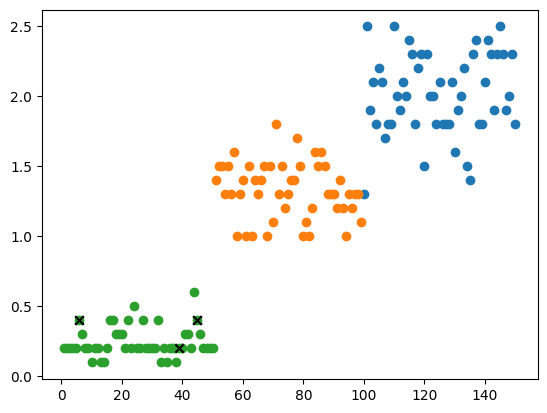

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 626.1666666666666)

In [23]:
classifier_1(3, X_data[0], X_data[4], 100, Y_data)

#Method 2: by taking centroids anywhere in the graph, i.e., may or may not be from the dataset

In [24]:
def find_dist_2(dataset, centroid):
  sum = 0
  datasett = dataset.T
  datasett = datasett - centroid
  return np.sqrt(np.sum(np.square(datasett), axis=1).astype(float))


In [25]:
def update_centroids_2(classified, dataset, centroids):
  for i in range(centroids.shape[0]):
    if sum(classified == i)>0:
      centroids[i] = np.sum(dataset.T[classified == i], axis=0)/sum(classified == i)
  return centroids

In [75]:
def k_clustering_2(dataset, k, iterations):

  #find initial centroids
  centroids = [[] for _ in range(k)]
  for i in  range(k):
    for j in range(dataset.shape[0]):
      centroids[i].append(np.random.randint(np.min(dataset[j]),np.max(dataset[j])))
  centroids = np.array(centroids)
  #find distance of all the points from centroids
  dist = []
  for i in range(k):
    dist.append(find_dist_2(dataset, centroids[i]))
  dist = np.array(dist)

  #classify
  classified  = np.argmin(dist, axis=0)
  var = 0
  #run iterations to change the means
  for i in range(iterations+1):
    centroids = update_centroids_2(classified, dataset, centroids)
    dist = []
    for i in range(k):
      dist.append(find_dist_2(dataset, centroids[i]))
    dist = np.array(dist)
    classified  = np.argmin(dist, axis=0)

    #finding variance
    var = 0
    for i in range(k):
        if (sum(classified == i)>0): var+= sum(np.square(dist[i][classified==i].astype(float)))/sum(classified==i)

    print("variance : ",var)
    for i in range(k):
        plt.scatter(dataset[0][classified == i], dataset[1][classified == i], label=f'Cluster {i+1}')
        plt.scatter(centroids[i][0],centroids[i][1], marker="x", color="black")

    plt.legend()
    plt.title('Iteration')
    plt.show()
  return classified, var


variance :  1086.1532263814618


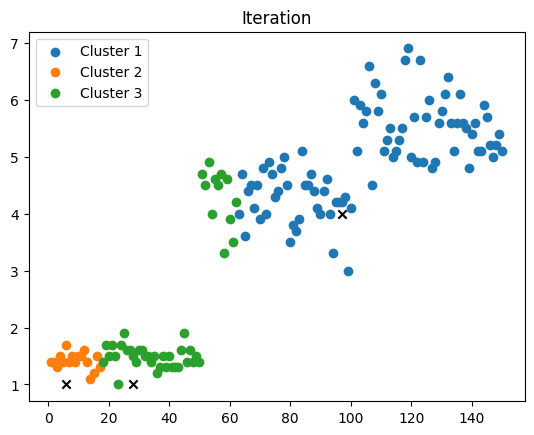

variance :  866.1732532051283


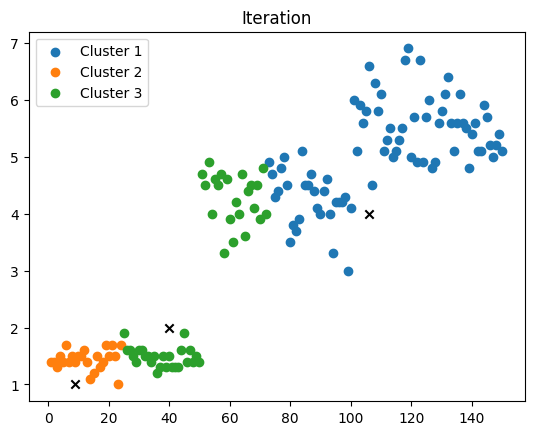

variance :  769.9520156386595


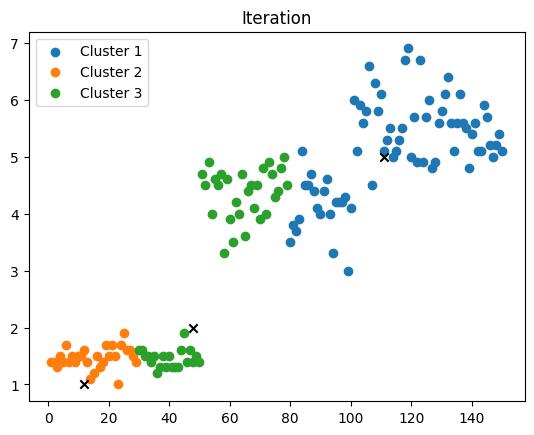

variance :  713.204925490196


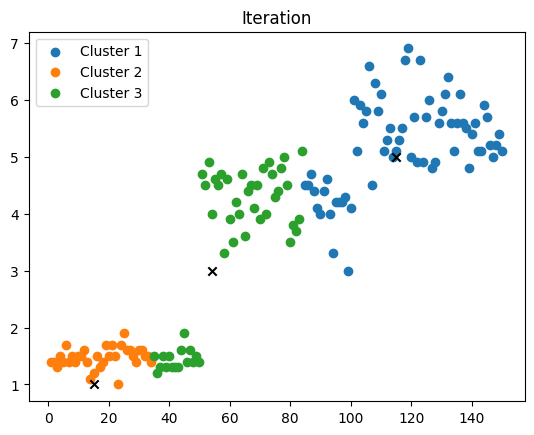

variance :  680.1940846163027


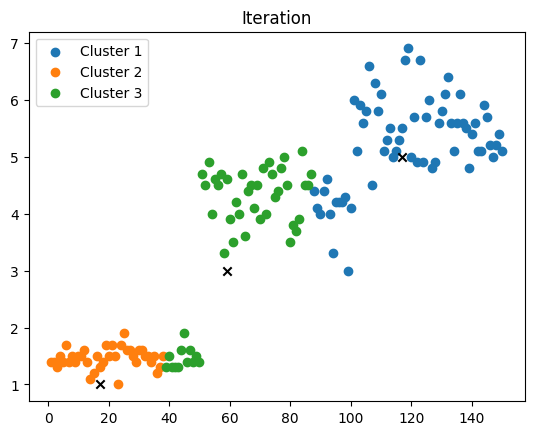

variance :  658.1064767711963


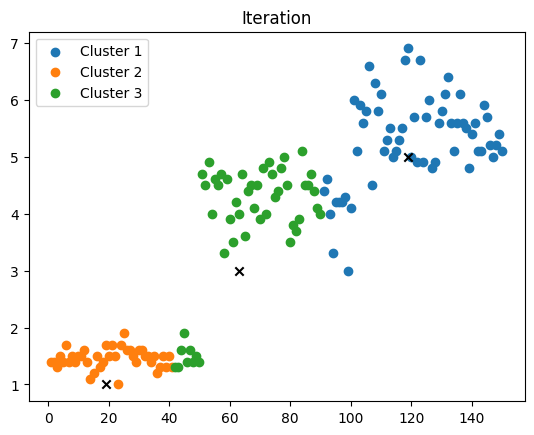

variance :  644.4222161759653


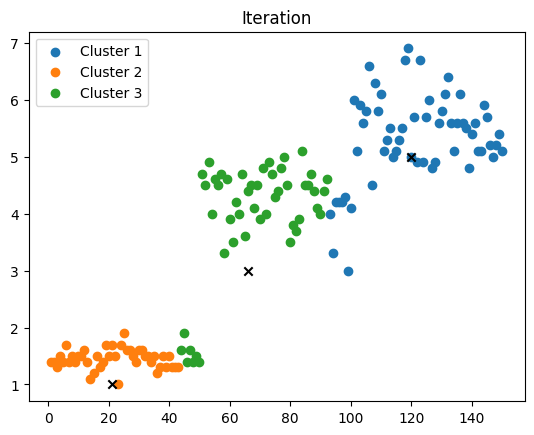

variance :  640.0180668934241


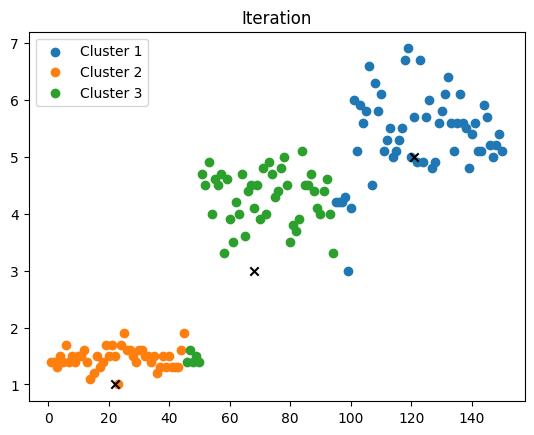

variance :  633.8528547504026


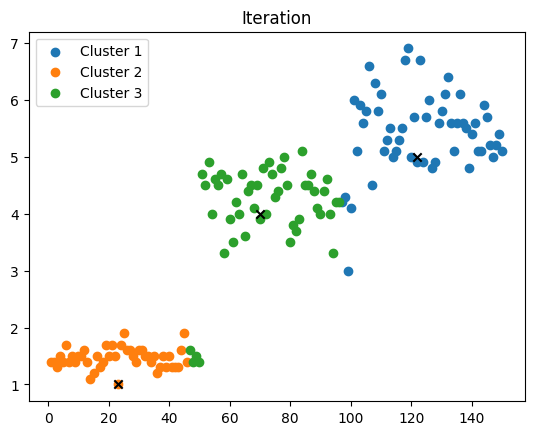

variance :  632.0747544761141


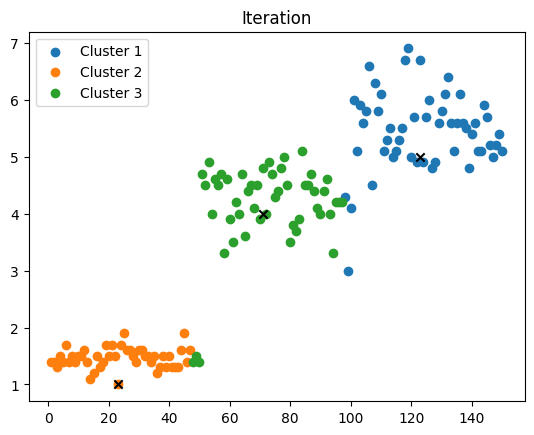

variance :  629.609625


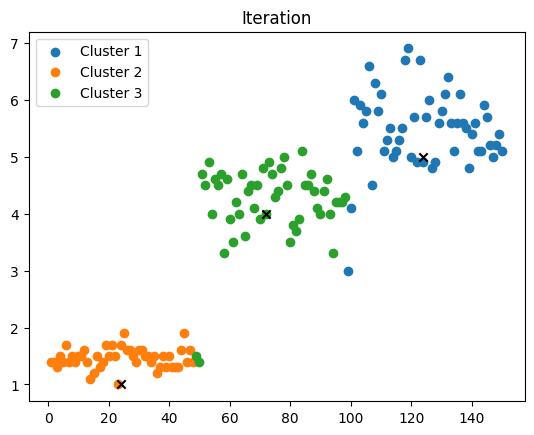

variance :  627.6096250000002


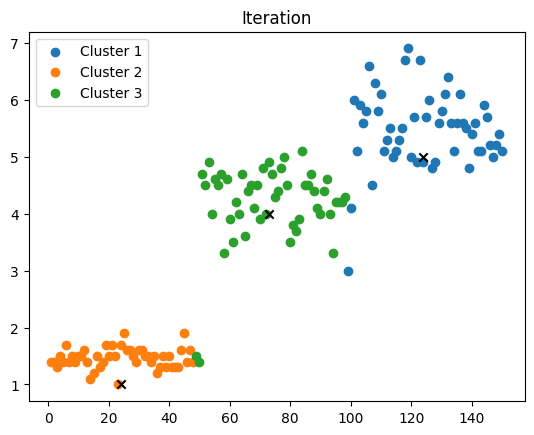

variance :  627.6096250000002


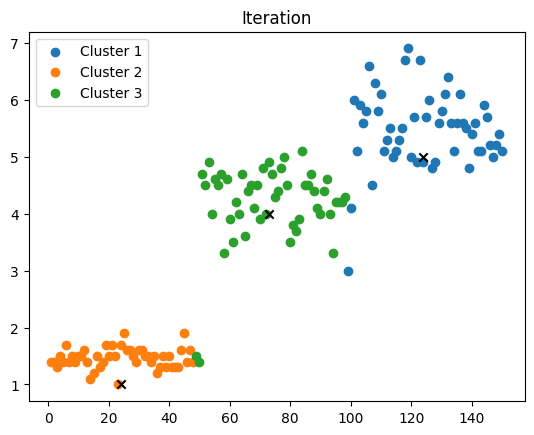

variance :  627.6096250000002


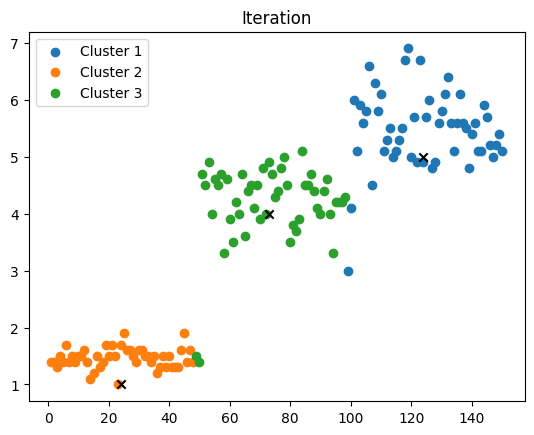

variance :  627.6096250000002


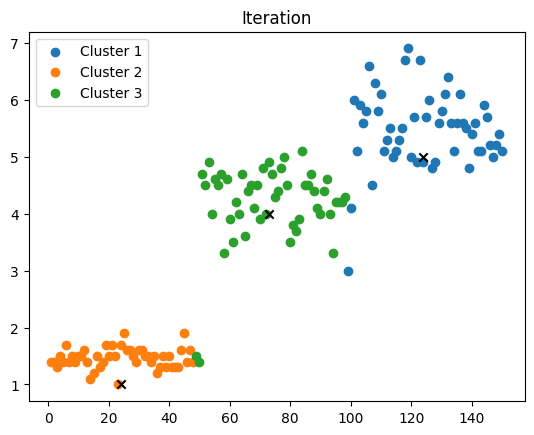

variance :  627.6096250000002


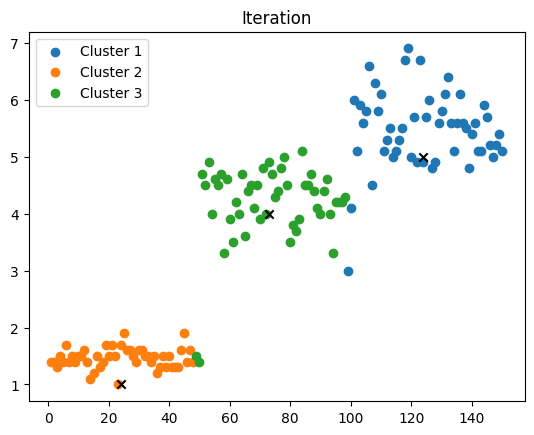

variance :  627.6096250000002


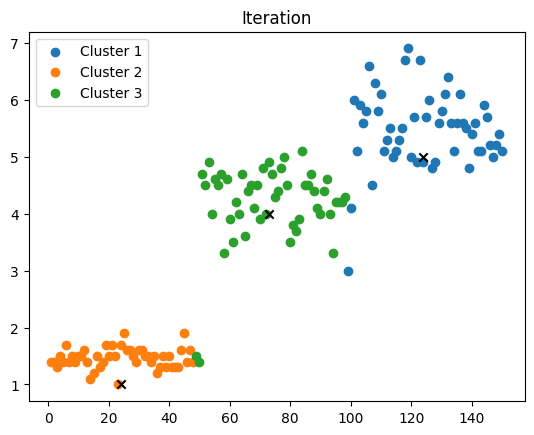

variance :  627.6096250000002


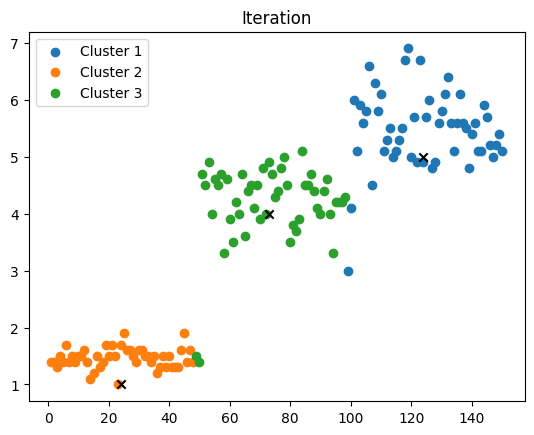

variance :  627.6096250000002


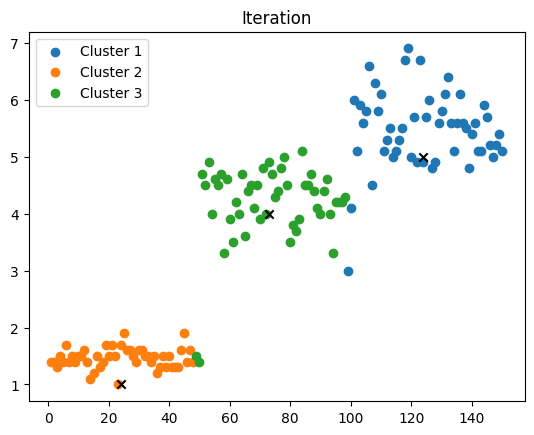

variance :  627.6096250000002


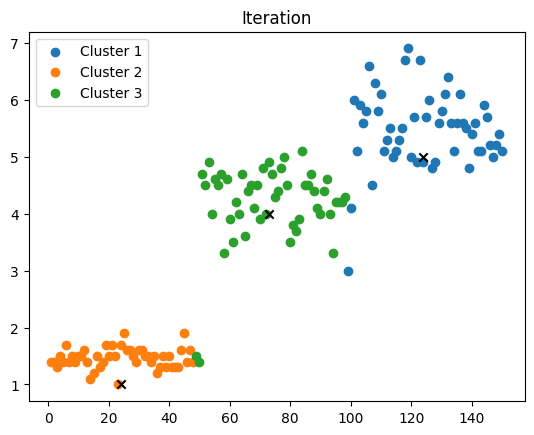

variance :  627.6096250000002


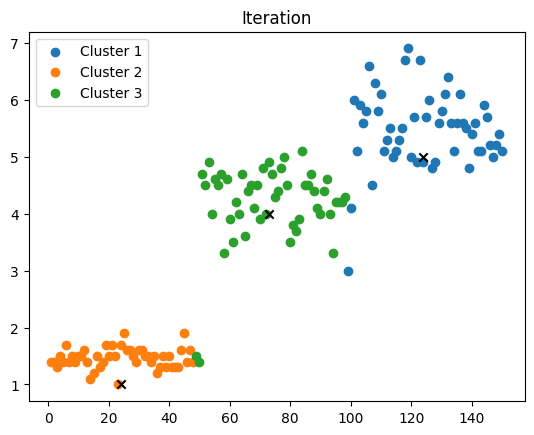

variance :  627.6096250000002


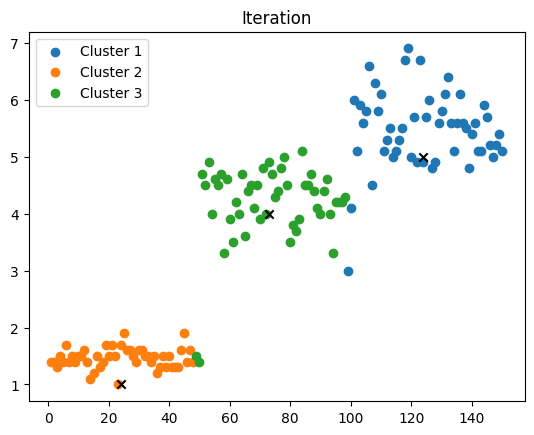

variance :  627.6096250000002


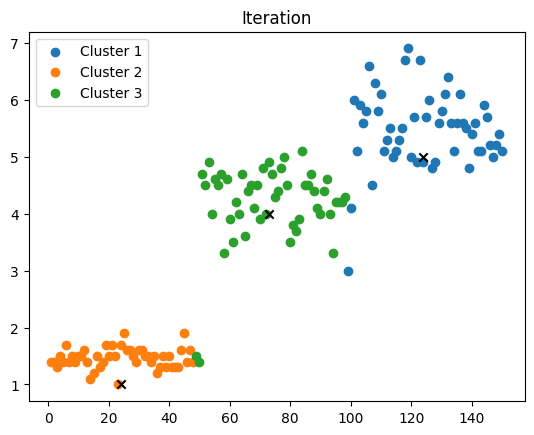

variance :  627.6096250000002


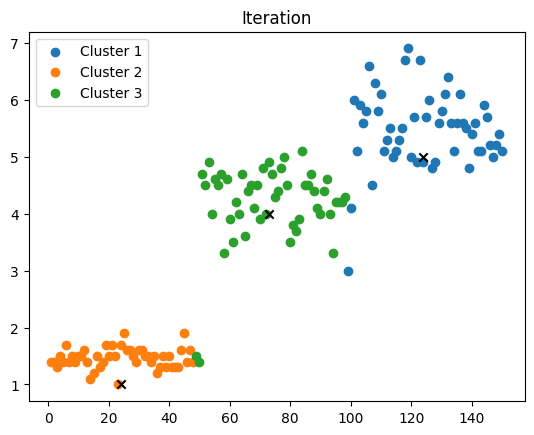

variance :  627.6096250000002


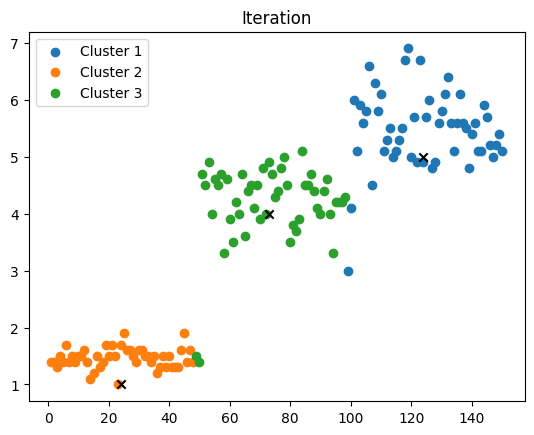

variance :  627.6096250000002


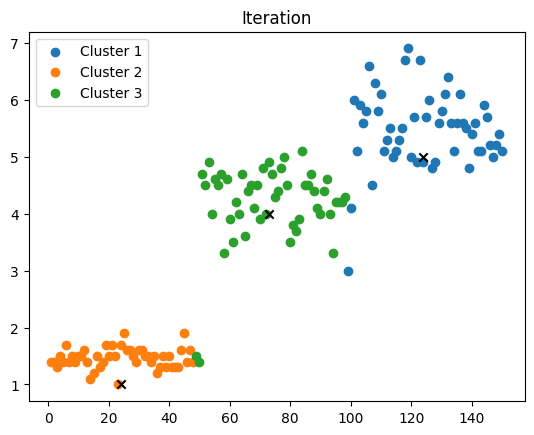

variance :  627.6096250000002


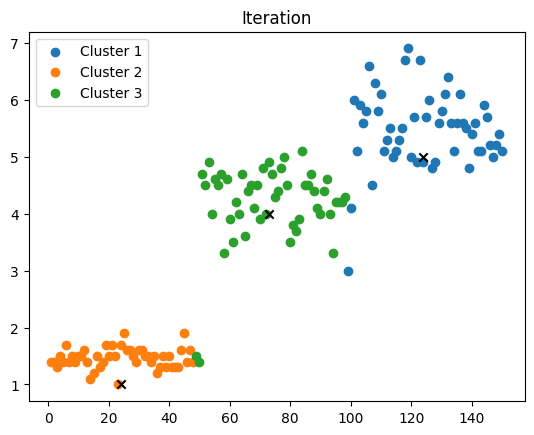

variance :  627.6096250000002


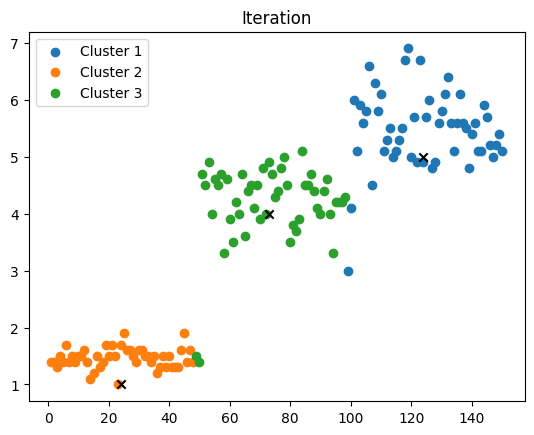

variance :  627.6096250000002


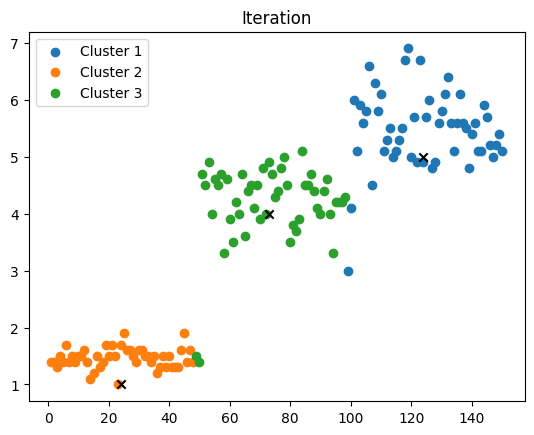

variance :  627.6096250000002


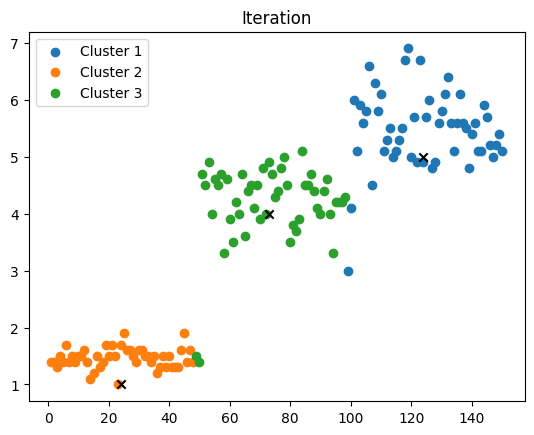

variance :  627.6096250000002


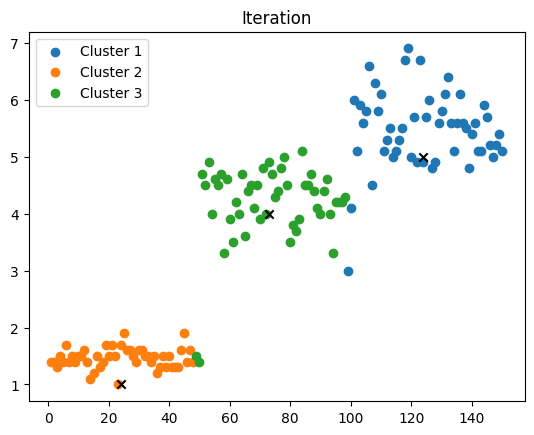

variance :  627.6096250000002


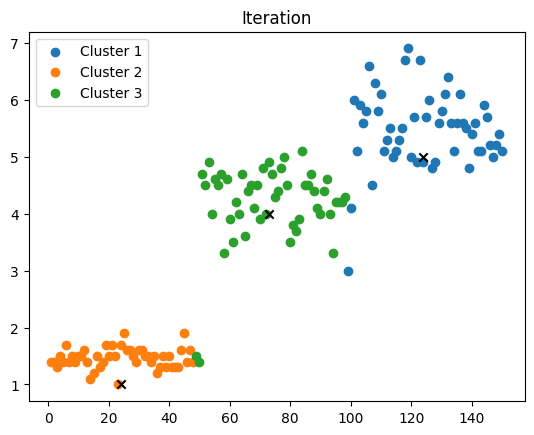

variance :  627.6096250000002


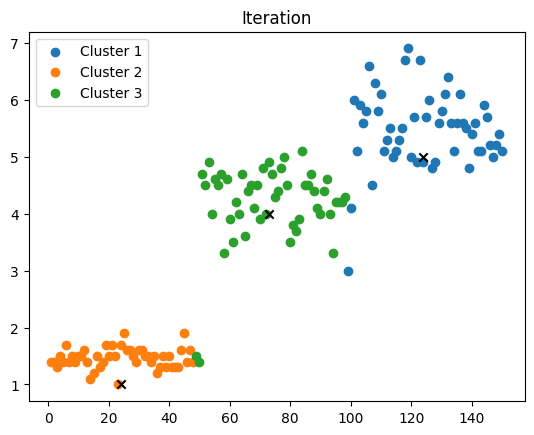

variance :  627.6096250000002


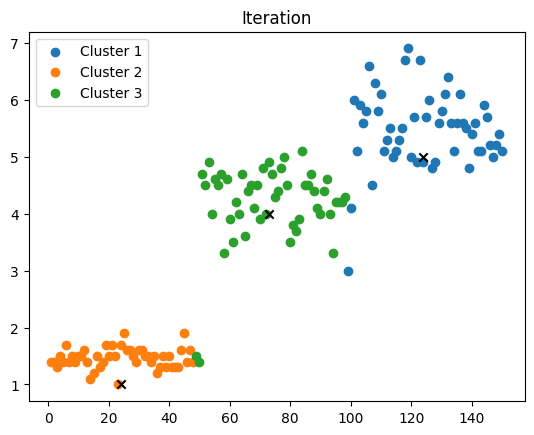

variance :  627.6096250000002


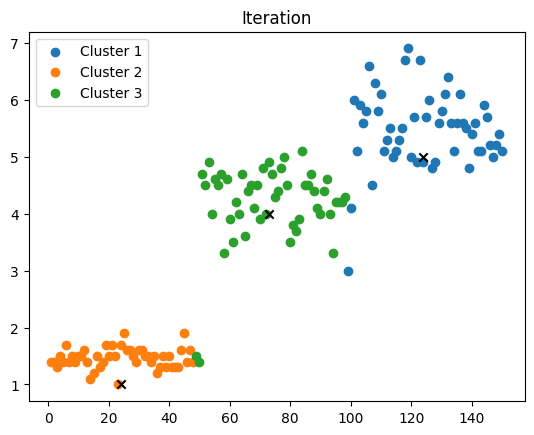

variance :  627.6096250000002


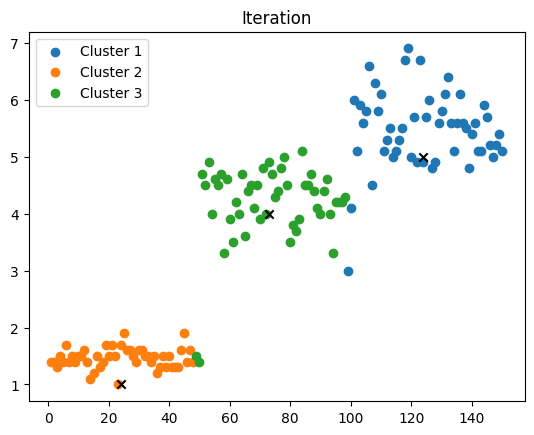

variance :  627.6096250000002


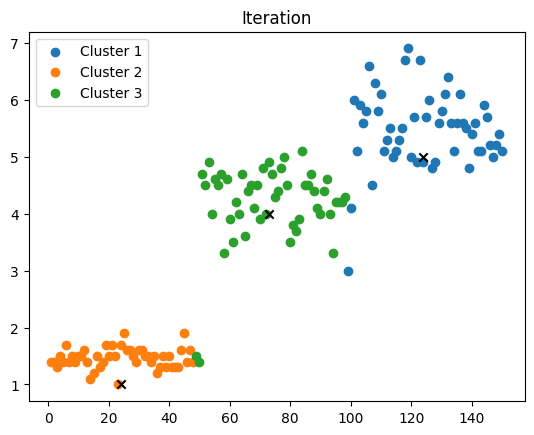

variance :  627.6096250000002


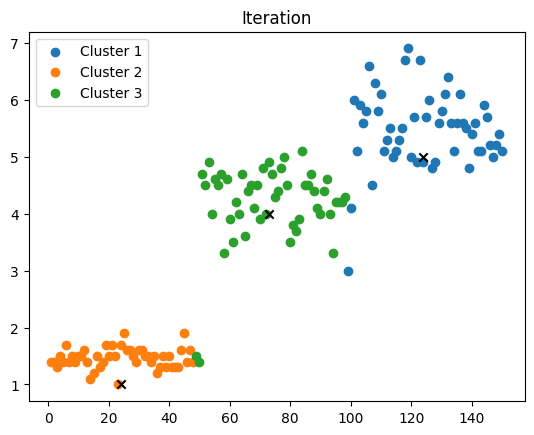

variance :  627.6096250000002


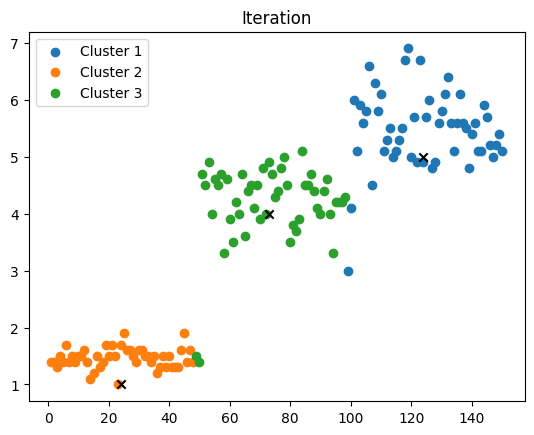

variance :  627.6096250000002


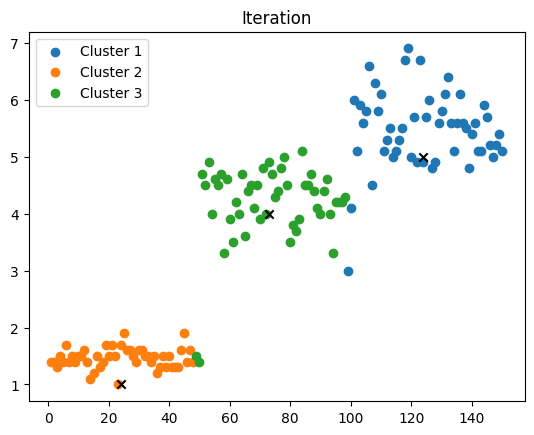

variance :  627.6096250000002


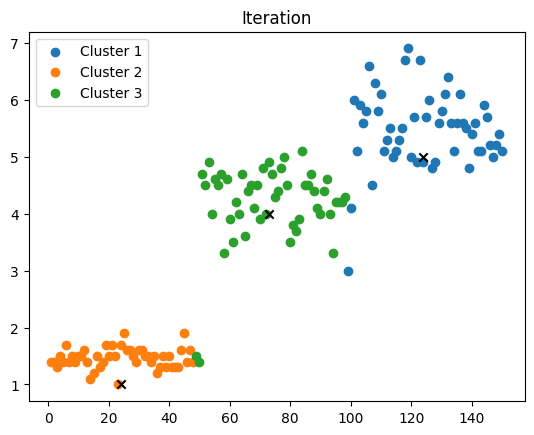

variance :  627.6096250000002


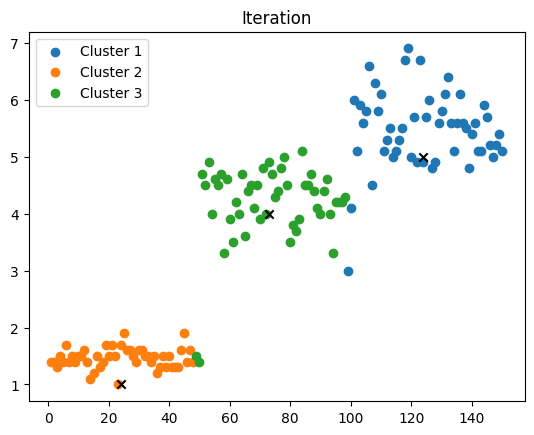

variance :  627.6096250000002


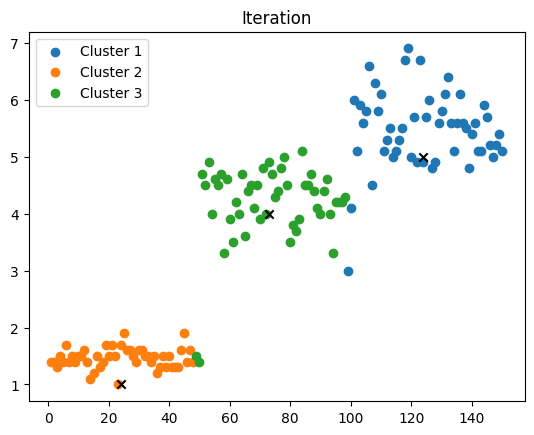

variance :  627.6096250000002


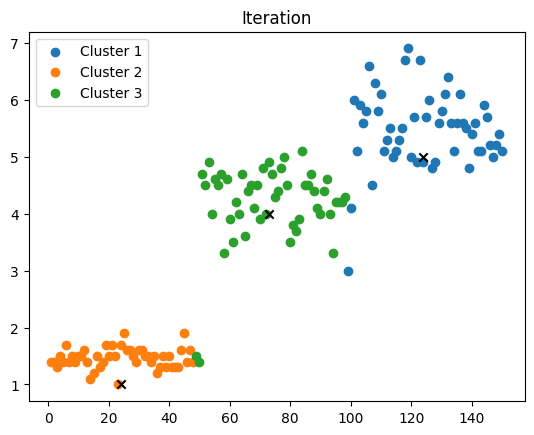

variance :  627.6096250000002


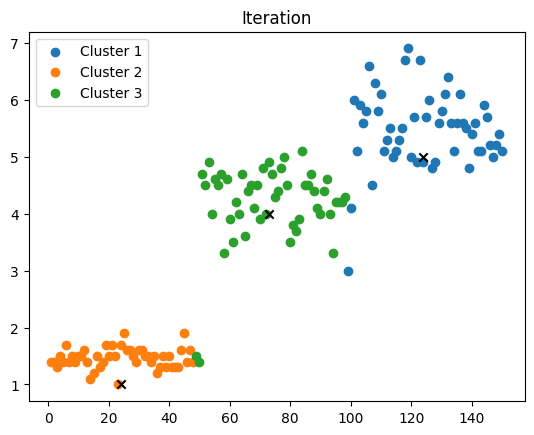

variance :  627.6096250000002


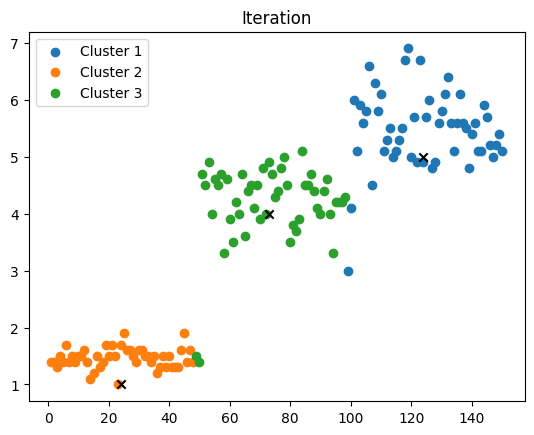

variance :  627.6096250000002


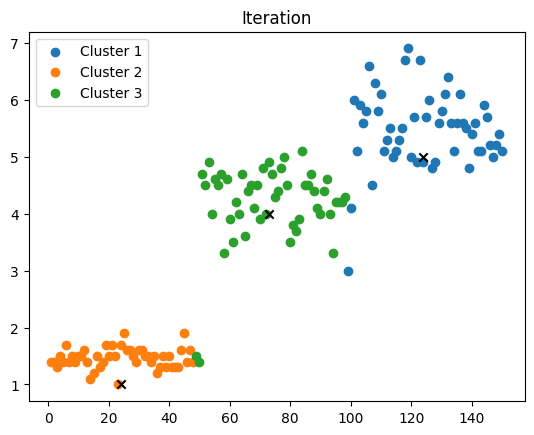

variance :  627.6096250000002


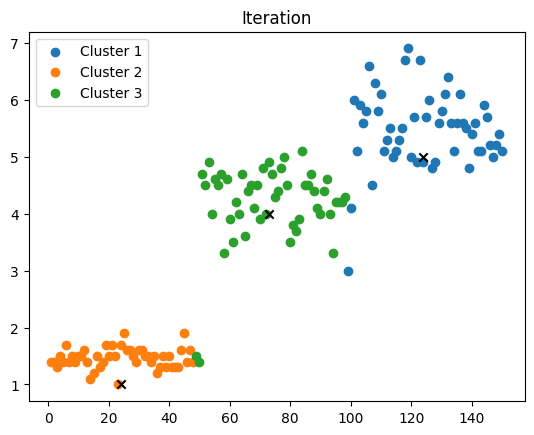

variance :  627.6096250000002


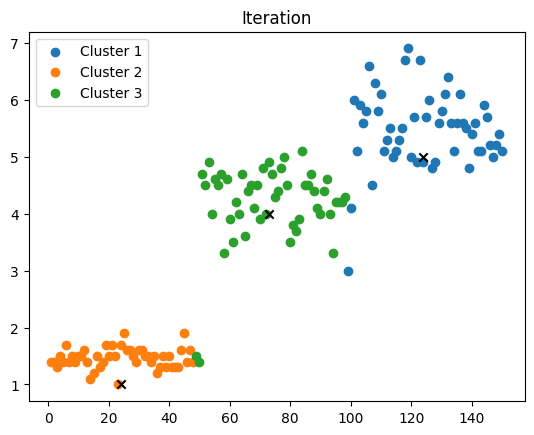

variance :  627.6096250000002


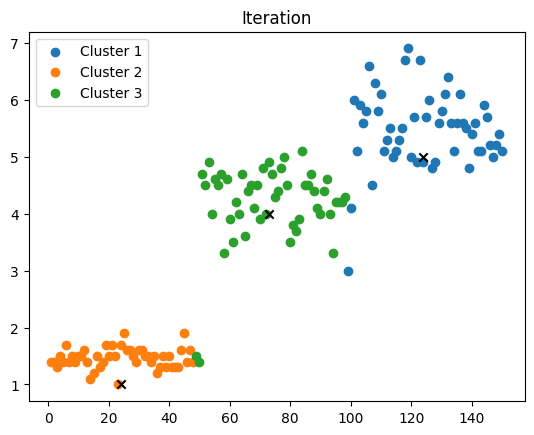

variance :  627.6096250000002


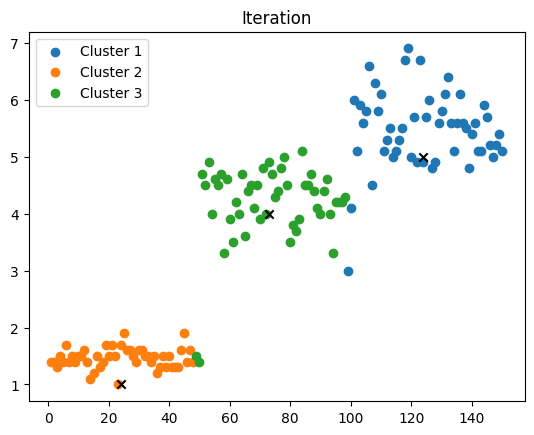

best variation :  627.6096250000002


In [76]:
#running the classifier
data = np.array((X_data[0],X_data[3]))
data
classified, var = k_clustering_2(data, 3, 50)

print("best variation : ", var)